In [1]:
import pandas as pd
import geopandas as gpd
import folium
from folium import Choropleth
import warnings
warnings.filterwarnings('ignore')

c:\softwares\python3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
c:\softwares\python3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
c:\softwares\python3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
# Read Expenditure data
expenditure = pd.read_csv('data/healthcare-expenditure-vs-gdp.csv')
expenditure.head()

,Entity,Code,Year,"Total population (Gapminder, HYDE & UN)",Continent,"GDP per capita, PPP (constant 2011 international $)","Health expenditure per capita, PPP (constant 2011 international $)"
0,Abkhazia,OWID_ABK,2015,NaN,Asia,NaN,NaN
1,Afghanistan,AFG,1800,3280000.0,NaN,NaN,NaN
2,Afghanistan,AFG,1801,3280000.0,NaN,NaN,NaN
3,Afghanistan,AFG,1802,3280000.0,NaN,NaN,NaN
4,Afghanistan,AFG,1803,3280000.0,NaN,NaN,NaN


In [3]:
# Clean up data
expenditure.rename(columns={'Total population (Gapminder, HYDE & UN)': 'Population',
                            'GDP per capita, PPP (constant 2011 international $)': 'GDP',
                            'Health expenditure per capita, PPP (constant 2011 international $)': 'Expenditure'}, inplace=True)
expenditure = expenditure[(expenditure['GDP'].notna() & expenditure['Expenditure'].notna())]
print(expenditure.info())
expenditure.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4525 entries, 203 to 48166
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Entity       4525 non-null   object 
 1   Code         3635 non-null   object 
 2   Year         4525 non-null   int64  
 3   Population   3655 non-null   float64
 4   Continent    0 non-null      object 
 5   GDP          4525 non-null   float64
 6   Expenditure  4525 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 282.8+ KB
None


,Entity,Code,Year,Population,Continent,GDP,Expenditure
203,Afghanistan,AFG,2002,22601000.0,NaN,1063.635574,75.983514
204,Afghanistan,AFG,2003,23681000.0,NaN,1099.194507,89.440178
205,Afghanistan,AFG,2004,24727000.0,NaN,1062.249360,87.520903
206,Afghanistan,AFG,2005,25654000.0,NaN,1136.123214,88.323062
207,Afghanistan,AFG,2006,26433000.0,NaN,1161.124889,86.856016


In [4]:
# Find counts of Year. This would tell us which year has all the required data available
expenditure.Year.value_counts()

2011    231
2010    230
2008    230
2012    230
2009    230
2007    230
2013    230
2014    230
2006    229
2005    229
2003    229
2004    229
2002    228
2001    227
2000    226
1999    220
1998    219
1997    218
1996    216
1995    214
Name: Year, dtype: int64

### Lets find percentage of gdp spent as health expenditure

In [5]:
expenditure['Percentage'] = expenditure['Expenditure'] * 100.0 / expenditure['GDP']
expenditure.head()

,Entity,Code,Year,Population,Continent,GDP,Expenditure,Percentage
203,Afghanistan,AFG,2002,22601000.0,NaN,1063.635574,75.983514,7.143754
204,Afghanistan,AFG,2003,23681000.0,NaN,1099.194507,89.440178,8.136884
205,Afghanistan,AFG,2004,24727000.0,NaN,1062.249360,87.520903,8.239205
206,Afghanistan,AFG,2005,25654000.0,NaN,1136.123214,88.323062,7.774074
207,Afghanistan,AFG,2006,26433000.0,NaN,1161.124889,86.856016,7.480334


### TASK 1 : Get all countries that spend less than 5% of their GDP on healthcare in 2011

In [6]:
filtered_df = expenditure[(expenditure['Year'] == 2011) & (expenditure['Percentage'] < 5.0)].copy()
filtered_df['Entity'].unique()

array(['Angola', 'Arab World', 'Armenia', 'Azerbaijan', 'Bahrain',
       'Bangladesh', 'Belarus', 'Benin', 'Bhutan', 'Brunei', 'Cameroon',
       'Cape Verde', 'Central African Republic', 'Chad', 'China', 'Congo',
       'Democratic Republic of Congo', 'Dominican Republic',
       'Early-demographic dividend', 'East Asia & Pacific (IDA & IBRD)',
       'East Asia & Pacific (excluding high income)', 'Equatorial Guinea',
       'Eritrea', 'Fiji', 'Fragile and conflict affected situations',
       'Gabon', 'Ghana', 'Guinea', 'IDA blend', 'IDA only', 'IDA total',
       'India', 'Indonesia', 'Iraq', 'Kazakhstan', 'Kuwait', 'Laos',
       'Latvia', 'Least developed countries: UN classification',
       'Lower middle income', 'Madagascar', 'Malaysia', 'Mauritania',
       'Mauritius', 'Middle East & North Africa', 'Mongolia', 'Myanmar',
       'Nigeria', 'Oman', 'Other small states', 'Pakistan',
       'Papua New Guinea', 'Peru', 'Philippines',
       'Pre-demographic dividend', 'Qatar',
  

In [7]:
# Plot all of these countries on the map
worldfilepath = gpd.datasets.get_path('naturalearth_lowres')
world = gpd.read_file(worldfilepath)
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [8]:
filtered_df.rename(columns={'Code': 'iso_a3'}, inplace=True)
five_percent = filtered_df.merge(world, on='iso_a3')
five_percent.head()

,Entity,iso_a3,Year,Population,Continent,GDP,Expenditure,Percentage,pop_est,continent,name,gdp_md_est,geometry
0,Angola,AGO,2011,24221000.0,NaN,5911.254092,220.500282,3.730178,29310273,Africa,Angola,189000.0,"MULTIPOLYGON (((12.99552 -4.78110, 12.63161 -4..."
1,Armenia,ARM,2011,2877000.0,NaN,7022.103943,252.650423,3.597931,3045191,Asia,Armenia,26300.0,"POLYGON ((46.50572 38.77061, 46.14362 38.74120..."
2,Azerbaijan,AZE,2011,9146000.0,NaN,15754.152363,784.521610,4.979777,9961396,Asia,Azerbaijan,167900.0,"MULTIPOLYGON (((46.40495 41.86068, 46.68607 41..."
3,Bangladesh,BGD,2011,149272992.0,NaN,2570.850145,81.400564,3.166290,157826578,Asia,Bangladesh,628400.0,"POLYGON ((92.67272 22.04124, 92.65226 21.32405..."
4,Belarus,BLR,2011,9415000.0,NaN,17166.695643,816.230045,4.754730,9549747,Europe,Belarus,165400.0,"POLYGON ((28.17671 56.16913, 29.22951 55.91834..."


In [9]:
# Create the Geodataframe for the plot
five_percent = five_percent[["iso_a3", "Percentage", 'geometry', "Entity"]]
data = five_percent[['iso_a3', 'Percentage']].set_index('iso_a3')

five_percent_gdf = gpd.GeoDataFrame(five_percent, crs='EPSG:4326').set_index('iso_a3')

In [10]:
def embed_map(m, filename):
    from IPython.display import IFrame
    m.save(filename)
    return IFrame(filename, width='100%', height='700px')    

In [11]:
m = folium.Map(location=[0.0, 0.0], tiles='openstreetmap', zoom_start=3)

Choropleth(geo_data=five_percent_gdf.__geo_interface__,
          data=data['Percentage'],
          key_on='feature.id',
          legend_name='Countries with less than 5% healthcare expenditure',
          fill_color='GnBu', highlight=True, ).add_to(m)
embed_map(m, 'five_percent_healthcare.html')

In [12]:
five_gdf = gpd.GeoDataFrame(five_percent, crs='EPSG:4326')
five_gdf.head()

,iso_a3,Percentage,geometry,Entity
0,AGO,3.730178,"MULTIPOLYGON (((12.99552 -4.78110, 12.63161 -4...",Angola
1,ARM,3.597931,"POLYGON ((46.50572 38.77061, 46.14362 38.74120...",Armenia
2,AZE,4.979777,"MULTIPOLYGON (((46.40495 41.86068, 46.68607 41...",Azerbaijan
3,BGD,3.166290,"POLYGON ((92.67272 22.04124, 92.65226 21.32405...",Bangladesh
4,BLR,4.754730,"POLYGON ((28.17671 56.16913, 29.22951 55.91834...",Belarus


In [13]:
style_function = lambda x: {'fillColor': '#ffffff', 
                            'color':'#000000', 
                            'fillOpacity': 0.1, 
                            'weight': 0.1}
highlight_function = lambda x: {'fillColor': '#000000', 
                                'color':'#000000', 
                                'fillOpacity': 0.50, 
                                'weight': 0.1}
layer = folium.features.GeoJson(
    five_gdf,
    style_function=style_function, 
    control=False,
    highlight_function=highlight_function, 
    tooltip=folium.features.GeoJsonTooltip(
        fields=['Entity','Percentage'],
        aliases=['Country: ','Percentage: '],
        style=("background-color: white; color: #333333; font-family: arial; font-size: 12px; padding: 10px;") 
    )
)
m.add_child(layer)
m.keep_in_front(layer)
folium.LayerControl().add_to(m)

embed_map(m, 'Five_percent_interactive.html')

### TASK 2 : Plot top 40 countries in the table in 2011

In [14]:
# Extract the first 30 countries
data_2011 = expenditure[expenditure['Year'] == 2011]
data_2011.rename(columns={'Code': 'iso_a3'}, inplace=True)
data_2011 = data_2011.merge(world, on='iso_a3')
data_2011.sort_values(by=["Percentage"], ascending=False, inplace=True)

data_2011_40 = data_2011.head(40)
data_2011_40 = data_2011_40[["Entity", 'iso_a3', 'Percentage', 'geometry']]
data_2011_40.head()

,Entity,iso_a3,Percentage,geometry
149,United States,USA,17.118293,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
123,Sierra Leone,SLE,13.362851,"POLYGON ((-13.24655 8.90305, -12.71196 9.34271..."
134,Sweden,SWE,11.167897,"POLYGON ((11.02737 58.85615, 11.46827 59.43239..."
83,Liberia,LBR,11.150938,"POLYGON ((-8.43930 7.68604, -8.48545 7.39521, ..."
103,New Zealand,NZL,11.063706,"MULTIPOLYGON (((176.88582 -40.06598, 176.50802..."


In [15]:
m = folium.Map([0.0, 0.0], tiles='openstreetmap', zoom_start=3)

# GeoData for plot
geo_data = data_2011_40.set_index("iso_a3")
geo_data_gdf = gpd.GeoDataFrame(geo_data, crs='EPSG:4326')

Choropleth(geo_data_gdf.__geo_interface__,
           data=geo_data['Percentage'],
           key_on='feature.id',
           fill_color='OrRd',
           legend_name='Top 40 countries').add_to(m)
embed_map(m, "top40_countries_non_interactive.html")

In [16]:
gdf = gpd.GeoDataFrame(data_2011_40, crs='EPSG:4326')

style_function = lambda x: {'fillColor': '#ffffff', 
                            'color':'#000000', 
                            'fillOpacity': 0.1, 
                            'weight': 0.1}
highlight_function = lambda x: {'fillColor': '#000000', 
                                'color':'#000000', 
                                'fillOpacity': 0.50, 
                                'weight': 0.1}
layer = folium.features.GeoJson(
    gdf,
    style_function=style_function, 
    control=False,
    highlight_function=highlight_function, 
    tooltip=folium.features.GeoJsonTooltip(
        fields=['Entity','Percentage'],
        aliases=['Country: ','Percentage: '],
        style=("background-color: white; color: #333333; font-family: arial; font-size: 12px; padding: 10px;") 
    )
)
m.add_child(layer)
m.keep_in_front(layer)
folium.LayerControl().add_to(m)

embed_map(m, 'Top40_interactive.html')

### There are some countries like Tuvalu, that have a high percentage of their GDP spent on healthcare. As the geometry for these countries is not available, we skip them

In [17]:
# Find out which countries these are
plotted_countries = list(data_2011_40.iso_a3)
print(plotted_countries)

actual_data = expenditure[expenditure['Year'] == 2011]
actual_data.sort_values(by=["Percentage"], ascending=False, inplace=True)

actual_data_40 = actual_data.head(40)
not_plotted = actual_data_40[~actual_data_40['Code'].isin(plotted_countries)]
not_plotted

['USA', 'SLE', 'SWE', 'LBR', 'NZL', 'UGA', 'CAN', 'LSO', 'DEU', 'NLD', 'MDA', 'AUT', 'HTI', 'DNK', 'CHE', 'PRT', 'BEL', 'GRC', 'AUS', 'JPN', 'CRI', 'SRB', 'PRY', 'ESP', 'JOR', 'HND', 'BIH', 'ITA', 'DJI', 'GBR', 'SVN', 'NAM', 'GEO', 'ISL', 'ZAF', 'FIN', 'URY', 'AFG', 'MWI', 'IRL']


,Entity,Code,Year,Population,Continent,GDP,Expenditure,Percentage
44684,Tuvalu,TUV,2011,11000.0,NaN,3181.601723,590.546542,18.561297
26461,Marshall Islands,MHL,2011,57000.0,NaN,3513.291213,603.028426,17.164203
31230,North America,NaN,2011,346251008.0,NaN,48978.076708,8126.573706,16.592268
27482,Micronesia (country),FSM,2011,103000.0,NaN,3412.906554,467.205991,13.689387
34394,Post-demographic dividend,NaN,2011,NaN,NaN,39128.450509,4852.754463,12.402113
17898,High income,NaN,2011,NaN,NaN,39921.979946,4778.124100,11.968655
31771,OECD members,NaN,2011,NaN,NaN,36554.095639,4338.032150,11.867431
14774,France,FRA,2011,63222000.0,NaN,37440.641495,4254.533108,11.363409
32602,Palau,PLW,2011,18000.0,NaN,12518.713031,1306.437914,10.435880
13714,Euro area,NaN,2011,NaN,NaN,37434.349675,3811.296067,10.181280


### Some of these dont even seem to be countries

### TASK 3 : Check if there is a correlation between child mortality and health expenditure

In [28]:
# Child Mortality Data
child_mortality = pd.read_csv('./data/child-mortality.csv')

child_mortality = child_mortality[child_mortality['Year'] == 2011]

# Change column names for easier use
child_mortality.rename(columns={'Child mortality (Select Gapminder, v10) (2017)': 'child_mortality',
                                'Code': 'iso_a3'}, inplace=True)

child_mortality.head()

# Health Expenditure Data
health_expenditure = expenditure.copy()
health_expenditure = health_expenditure[health_expenditure['Year'] == 2011]
health_expenditure.rename(columns={'Code': 'iso_a3'}, inplace=True)

health_expenditure = health_expenditure[["Entity", 'iso_a3', 'GDP', 'Expenditure', 'Percentage']]
health_expenditure.head()

,Entity,iso_a3,GDP,Expenditure,Percentage
212,Afghanistan,AFG,1660.739856,141.055733,8.493548
555,Albania,ALB,10207.764699,554.484117,5.431984
775,Algeria,DZA,12990.345016,686.218659,5.282528
1285,Angola,AGO,5911.254092,220.500282,3.730178
1576,Antigua and Barbuda,ATG,18605.316754,1129.023728,6.068285


<Figure size 720x720 with 0 Axes>

In [34]:
# Now we have all the data we need, just need to plot it. Merge them into a single DF
plot_data = child_mortality.merge(health_expenditure, on='iso_a3')
print(len(plot_data))
plot_data.head()

182


,Entity_x,iso_a3,Year,child_mortality,Entity_y,GDP,Expenditure,Percentage
0,Afghanistan,AFG,2011,86.4,Afghanistan,1660.739856,141.055733,8.493548
1,Albania,ALB,2011,16.0,Albania,10207.764699,554.484117,5.431984
2,Algeria,DZA,2011,26.6,Algeria,12990.345016,686.218659,5.282528
3,Angola,AGO,2011,111.0,Angola,5911.254092,220.500282,3.730178
4,Antigua and Barbuda,ATG,2011,9.9,Antigua and Barbuda,18605.316754,1129.023728,6.068285


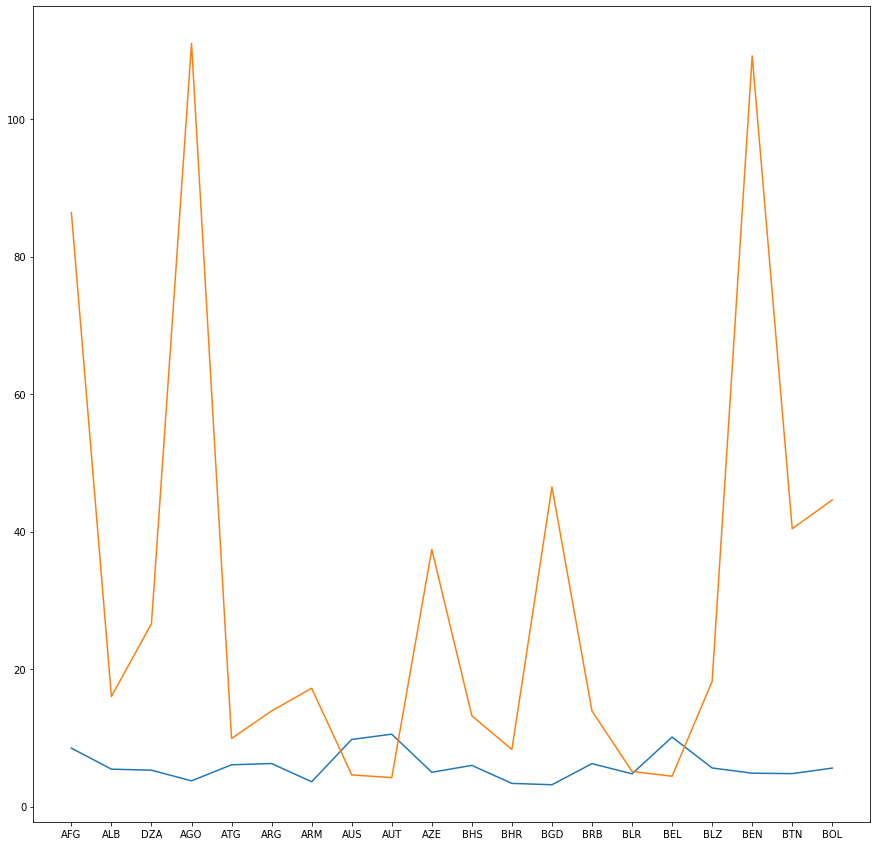

In [44]:
# Both the required data is available for 182 countries
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15, 15))
plt.plot(plot_data['iso_a3'][0:20], plot_data['Percentage'][0:20])
plt.plot(plot_data['iso_a3'][0:20], plot_data['child_mortality'][0:20])
plt.show()

### As we can see, whenever there is a rise in the percentage expenditure, there is a drop in the child mortality. Need to check these against different scales to truly ascertain the difference